In [2]:
import numpy as np
import scipy.stats as stat

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

$$ y = 2x - 1 \implies -2x + y + 1 = 0 $$

In [79]:
B_1 = 2
B_0 = -1

lx = stat.uniform.rvs(.5, 4.5, 100)
ly = 2 * lx - stat.norm.rvs(0, .5, 100)
lx = lx[np.logical_and(ly < 10, ly > 0)]
ly = ly[np.logical_and(ly < 10, ly > 0)]
ox = stat.uniform.rvs(0, 10, 100)
oy = stat.uniform.rvs(0, 10, 100)

x = np.hstack((lx, ox))
y = np.hstack((ly, oy))

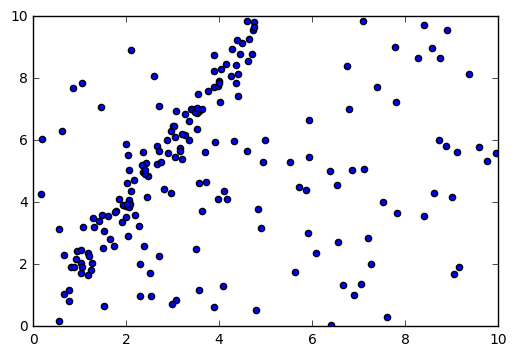

In [80]:
plt.scatter(x, y)
plt.xlim(0, 10)
plt.ylim(0, 10)

plt.show()

In [157]:
num_iterations = 100
outlier_threshold = .5

lines = []
outliers = []
pts = []
indices = np.arange(len(x))

for step in range(num_iterations):
    i1, i2 = np.random.choice(indices, 2, replace=False)
    cur_line = np.cross([x[i1], y[i1], 1], [x[i2], y[i2], 1])
    a,b,c = cur_line
    outs = 0
    for i in indics:
        dist = (a * x[i] + b * y[i] + c) / np.sqrt(a ** 2 + b ** 2)
        if np.abs(dist) > outlier_threshold:
            outs += 1
    outliers.append(outs)
    lines.append(cur_line)
    pts.append(((x[i1], y[i1]), (x[i2], y[i2])))

In [158]:
chosen_line = lines[np.argmin(outliers)]
chosen_line /= chosen_line[2]
print(chosen_line)

[-2.0865411   0.88294691  1.        ]


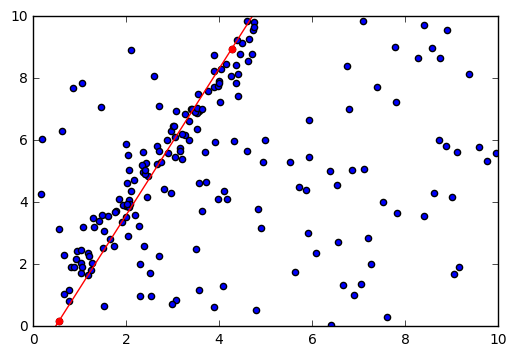

In [159]:
plt.scatter(x,y)


chosen_points = np.array(pts[np.argmin(outliers)])
plt.scatter(chosen_points[:,0], chosen_points[:,1], color="red")

xs = np.linspace(0, 10, 2)
ys = -1 * (chosen_line[0] * xs + chosen_line[2]) / chosen_line[1]

plt.plot(xs, ys, color="red")
plt.xlim(0,10)
plt.ylim(0,10)
plt.show()